In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Portofolio/Random Forest/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/content/drive/MyDrive/Portofolio/Random Forest/Random Forest.ipynb
/content/drive/MyDrive/Portofolio/Random Forest/car_evaluation.csv


sumber data : https://www.kaggle.com/datasets/waleedalzamil/car-evaluation/data

In [9]:
data = '/content/drive/MyDrive/Portofolio/Random Forest/car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [10]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Kolom : 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
df.shape

(1728, 7)

In [14]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


Dataset ini terdiri dari 7 variabel, di mana semua variabelnya termasuk dalam tipe data kategori. Variabel-variabel tersebut adalah buying, maint, doors, persons, lug_boot, safety, dan class. Yang perlu dipahami adalah bahwa variabel class merupakan variabel yang ingin kita prediksi.

In [17]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

Terlihat terdapat 4 kategori, yaitu : unacc,acc,good, dan vgood

In [18]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [19]:
X = df.drop(['class'], axis=1) #Selain class semua menjadi feature yang disimpan
#dalam var x

y = df['class'] #class menjadi target yang disimpan dalam var y

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#Split data 30:70


X_train.shape, X_test.shape



((1209, 6), (519, 6))

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [23]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [24]:
import category_encoders as ce

In [25]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Code diatas akan mengencoding / membuat value menjadi 1 standar yang sama, sehingga lebih mudah dikerjakan

In [26]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9037


In [59]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9268


In [60]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.266931
persons     0.222981
buying      0.187835
maint       0.151222
lug_boot    0.091797
doors       0.079234
dtype: float64

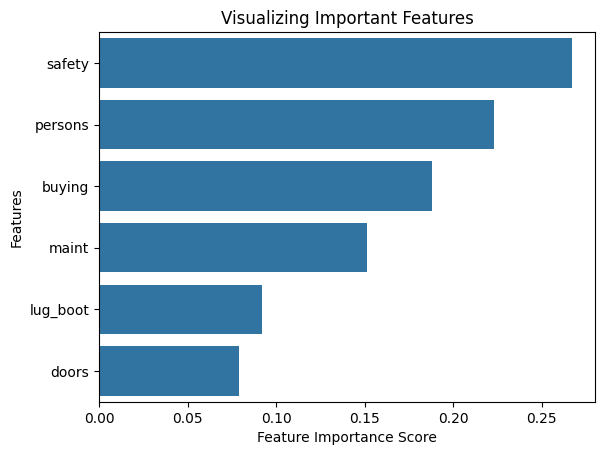

In [44]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

doors dan lug_boot mendapat nilai terendah dibawah angka 1, ini dijadikan acuan dalam pembuat keputusan, bahwa ini tidak terlalu signifikan

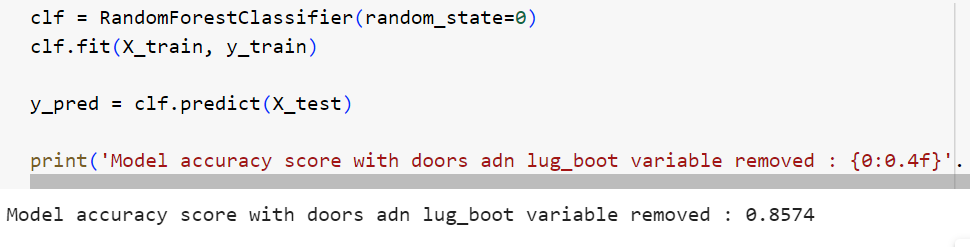


untuk itu saya mencoba hanya door yang dihapus,
dan melakukan hal yang sama seperti sebeluumnya


In [52]:
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons','lug_boot','safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [56]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9268


In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 98   7  10   3]
 [  0  17   0   2]
 [  9   0 349   0]
 [  3   4   0  17]]


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.83      0.86       118
        good       0.61      0.89      0.72        19
       unacc       0.97      0.97      0.97       358
       vgood       0.77      0.71      0.74        24

    accuracy                           0.93       519
   macro avg       0.81      0.85      0.82       519
weighted avg       0.93      0.93      0.93       519

